In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.getcwd()

'/scratch/anissa.el/macro_micro_niches/macro_micro_niches2022/TMENS_analysis/notebooks/keren_building_blocks_analysis'

In [2]:
import pandas as pd
from skimage import io
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from src.CellAbundance import CellAbundance, generate_abundance_matrix, join_abundance_matrices
from src.utils.visualization import radius_pc_heatmap, plot_cells_positions, plot_cev_radius, plot_stacked_var_radius, radius_pc_all_variance, radius_pc_variance_contourf

## Gaussian weigthing counting

5.0
7.0
11.0
17.0
25.0
38.0
57.0
85.0
127.0
190.0


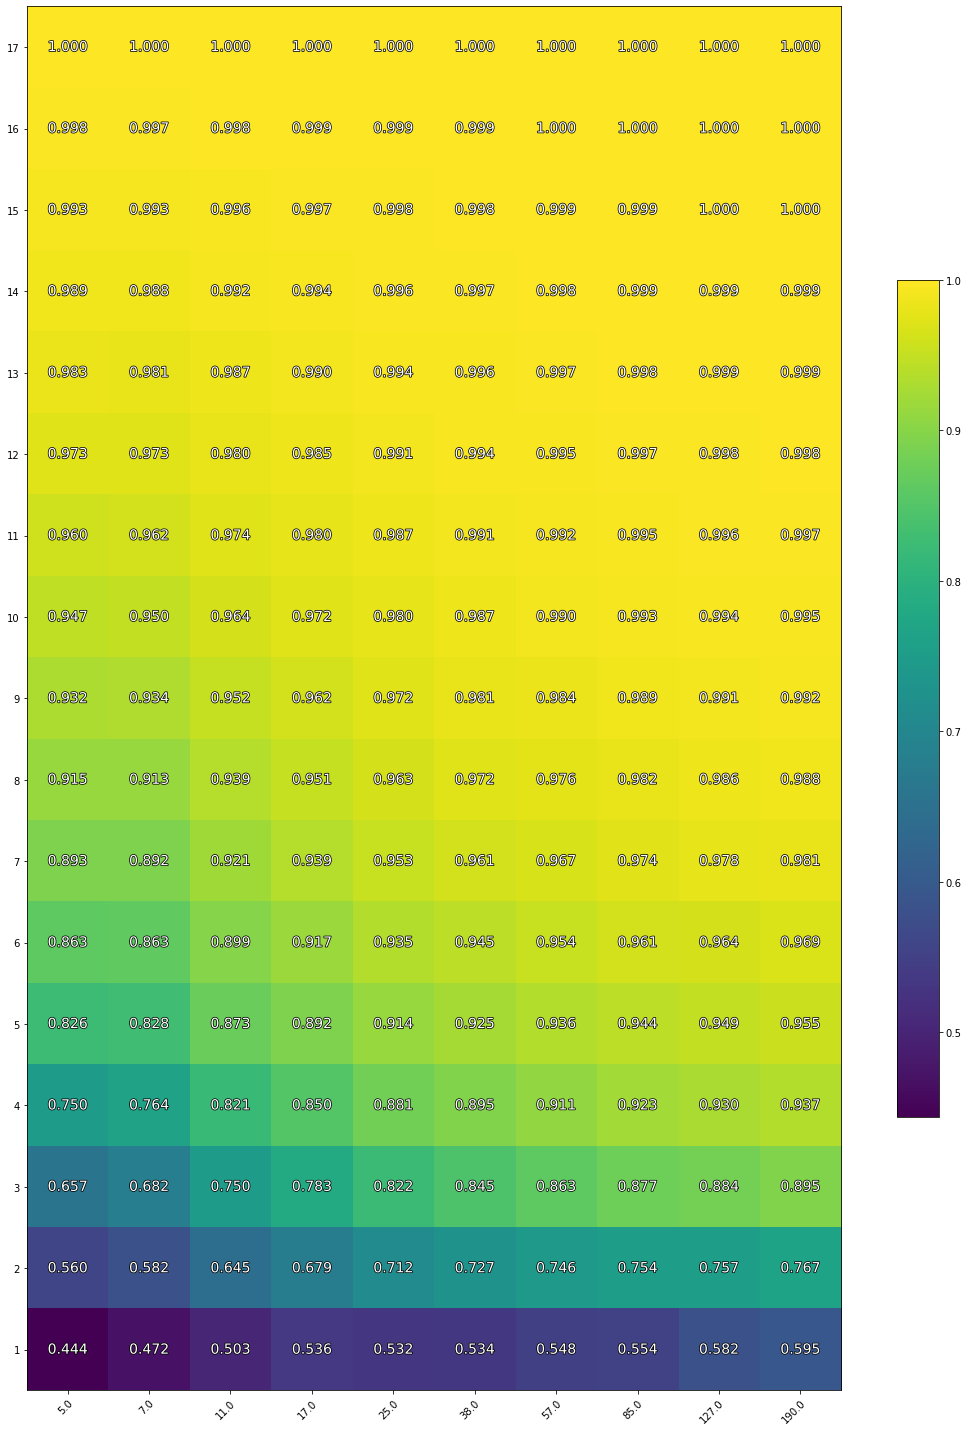

In [3]:
full_patient_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
N_SITE = 100
ROOT_DATA_PATH = "../../data/cell_positions_data" #"../../../fabio/output/cell_positions_data"
CELL_TYPES = ['CD8-T', 'Other immune', 'DC / Mono', 'CD3-T', 'B', 'NK', 'Keratin-positive tumor', 'Tumor', 
              'CD4-T', 'Mesenchymal-like', 'Macrophages', 'Endothelial', 'Tregs', 'Unidentified', 'DC', 'Mono / Neu', 
              'Neutrophils']

radius = np.linspace(np.log(5), np.log(190), num=10)
radius = np.rint(np.power(np.e, radius).astype(float))
METHOD = 'gaussian'

expl_var_ratio_gauss = {}
for r in radius:
    print(r)
    #abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, full_patient_ids, N_SITE, r, method=METHOD, snr=3, root=ROOT_DATA_PATH)
    gaussian_count_list = generate_abundance_matrix(CELL_TYPES, full_patient_ids, N_SITE, r, method=METHOD, snr=3, root=ROOT_DATA_PATH)
    sites, patient_ids,s_ids, _ = join_abundance_matrices(gaussian_count_list)
    pca = PCA()
    pc = pca.fit_transform(sites)
    expl_var_ratio_gauss[r] = np.cumsum(pca.explained_variance_ratio_)
radius_pc_heatmap(expl_var_ratio_gauss)

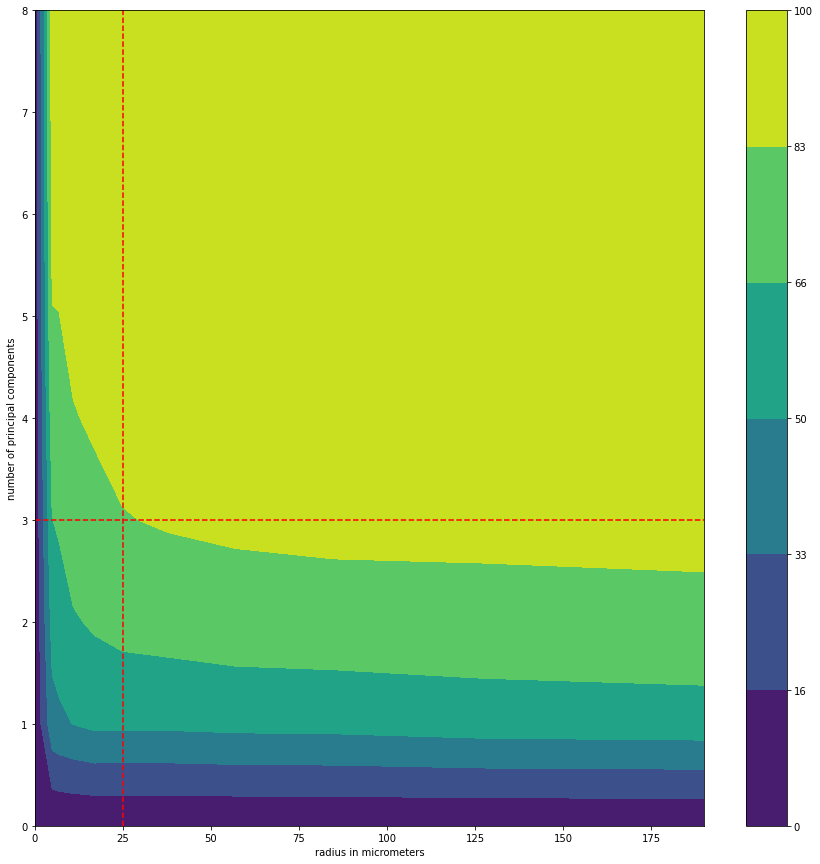

In [4]:
radius_pc_all_variance(expl_var_ratio_gauss,radius_lim=25,nPC_lim=3,
                       save_fig=True, path_fig="../../output/figs/plot_rad_var_gauss.svg")
#plt_radius_var.savefig("plot_rad_var_gauss.svg")#/srv/mfs/hausserlab/anissa.el/figs/